## Objective
* Prediction of Why Students Getting Low Grades

In [1]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import os
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

################# visualization #################
import matplotlib.pyplot as plt 
from PIL import  Image
import seaborn as sns 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

## Data Importing

In [2]:
import pandas as pd
Edu = pd.read_csv (r"C:\Users\omc\Desktop\Python\Machine Learning\Class Assessment\Logistic Regression using Python\xAPI-Edu-Data.csv")

#first few rows
Edu.head(10)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
5,F,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,42,30,13,70,Yes,Bad,Above-7,M
6,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,35,12,0,17,No,Bad,Above-7,L
7,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,10,15,22,Yes,Good,Under-7,M
8,F,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,12,21,16,50,Yes,Good,Under-7,M
9,F,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,70,80,25,70,Yes,Good,Under-7,M


## Data Pre-Processing

In [3]:
Edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [4]:
Edu.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


#### Identifying and Treatment of Missing Values

In [5]:
Edu.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

#### No Missing Data

In [6]:
Edu.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [7]:
for i in ['gender','NationalITy','PlaceofBirth','StageID','GradeID','SectionID','Topic','Semester','Relation','ParentAnsweringSurvey','ParentschoolSatisfaction','StudentAbsenceDays','Class']:
            print(Edu[i].value_counts())

M    305
F    175
Name: gender, dtype: int64
KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
Lybia            6
Iran             6
USA              6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64
KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
USA             16
SaudiArabia     16
Palestine       10
Tunis            9
Egypt            9
Syria            6
Lybia            6
Iran             6
Morocco          4
venzuela         1
Name: PlaceofBirth, dtype: int64
MiddleSchool    248
lowerlevel      199
HighSchool       33
Name: StageID, dtype: int64
G-02    147
G-08    116
G-07    101
G-04     48
G-06     32
G-11     13
G-12     11
G-09      5
G-10      4
G-05      3
Name: GradeID, dtype: int64
A    283
B    167
C     30
Name: SectionID, dtype: int64
IT           95
French       65
Arabic       59
Science      51
E

## Q.1 Visualize just the categorical features individually to see what options are included and how each option fares when it comes to count(how many times it appears) and see what can be deduce from that?

## Bar Plot for Category Variable

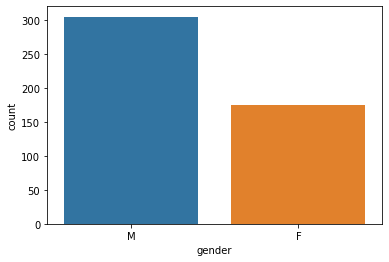

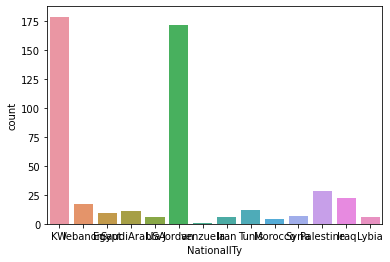

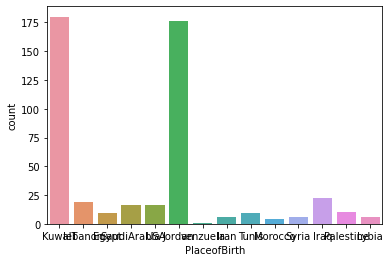

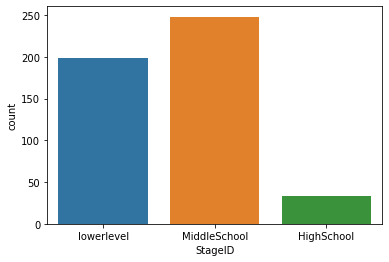

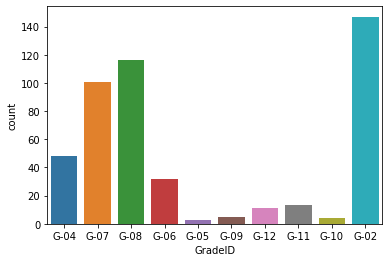

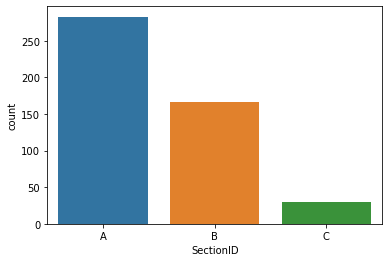

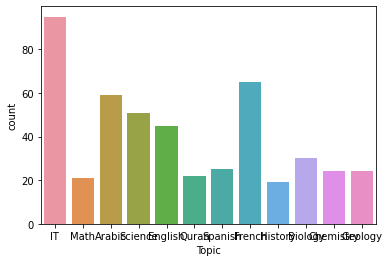

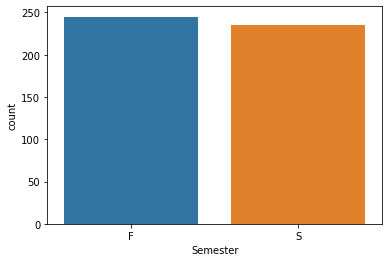

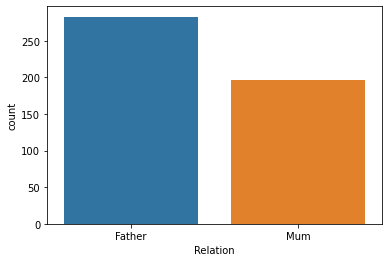

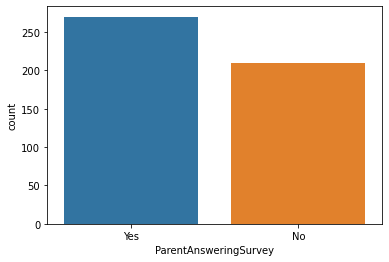

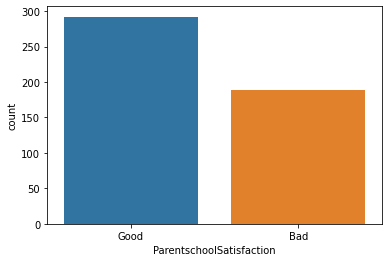

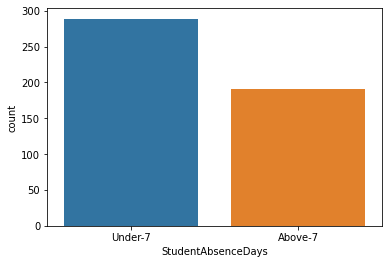

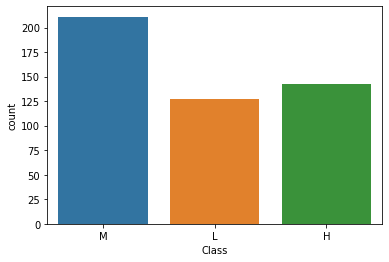

In [8]:
i=Edu.select_dtypes(include=['object']).columns
for j in i:
    plt.figure()
    sns.countplot(x=j,data=Edu)
    plt.show()

#### Insights:
* There are more numbers of Male than Female
* More Students are from Kuwait and Jordan and Middle school students are more
* Most of the students are from Topic IT and French 

## Q.2 Look at some categorical features in relation to each other, to see what insights could be possibly read?

<AxesSubplot:xlabel='StageID', ylabel='count'>

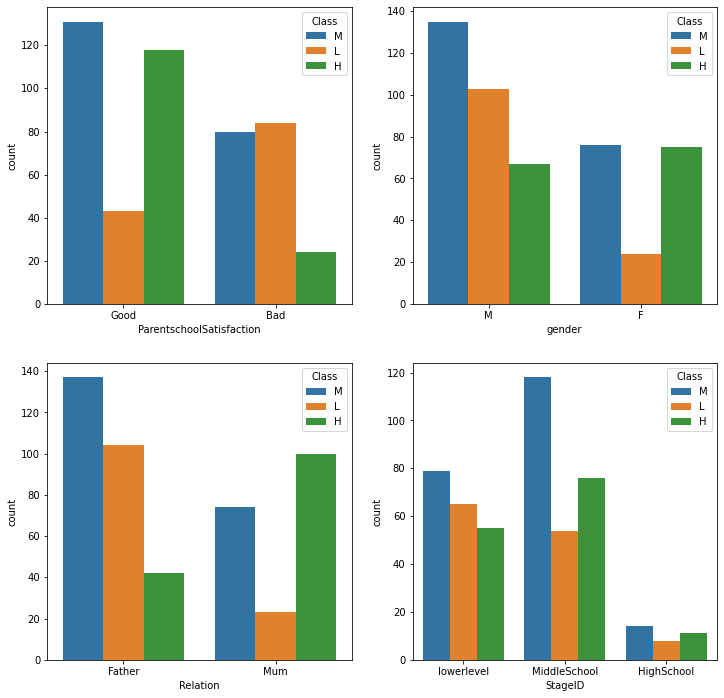

In [9]:
f , axes = plt.subplots(2,2,figsize=(12,12))

sns.countplot(x='ParentschoolSatisfaction',hue='Class',data=Edu,ax=axes[0,0])
sns.countplot(x='gender',hue='Class',data=Edu,ax=axes[0,1])
sns.countplot(x='Relation',hue='Class',data=Edu,ax=axes[1,0])
sns.countplot(x='StageID',hue='Class',data=Edu,ax=axes[1,1])

<AxesSubplot:xlabel='NationalITy', ylabel='count'>

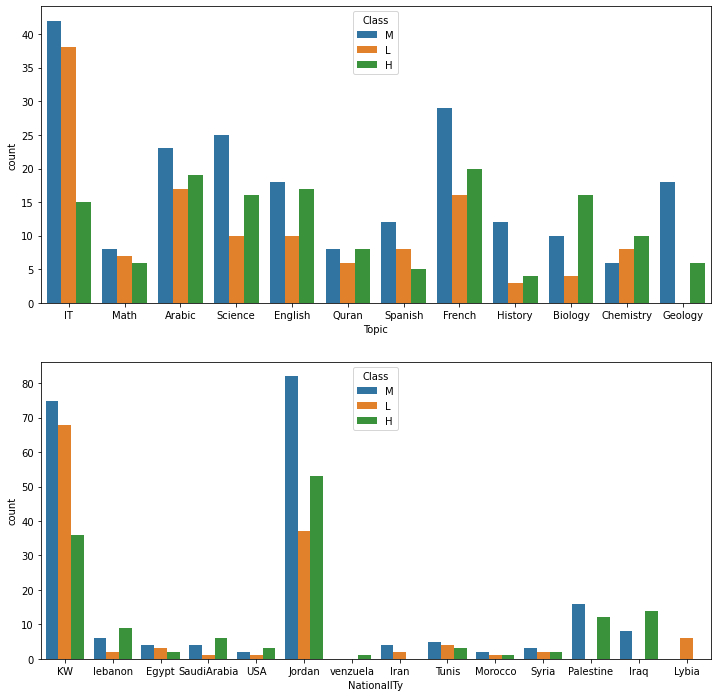

In [10]:
fig,(axis1,axis2) =plt.subplots (2,1, figsize=(12,12))
sns.countplot(x='Topic',hue='Class',data=Edu,ax=axis1)
sns.countplot(x='NationalITy',hue='Class',data=Edu, ax=axis2)

### Insights from Above Visualization
* Students who are Female having higher grades than Male
* Mothers are more focused than Fathers about students studies, having higher grades
* Lower the grades, parents satisfaction is bad

## Q.3 Visualize categorical variables with numerical variables and give conclusions?

<AxesSubplot:xlabel='Class', ylabel='Discussion'>

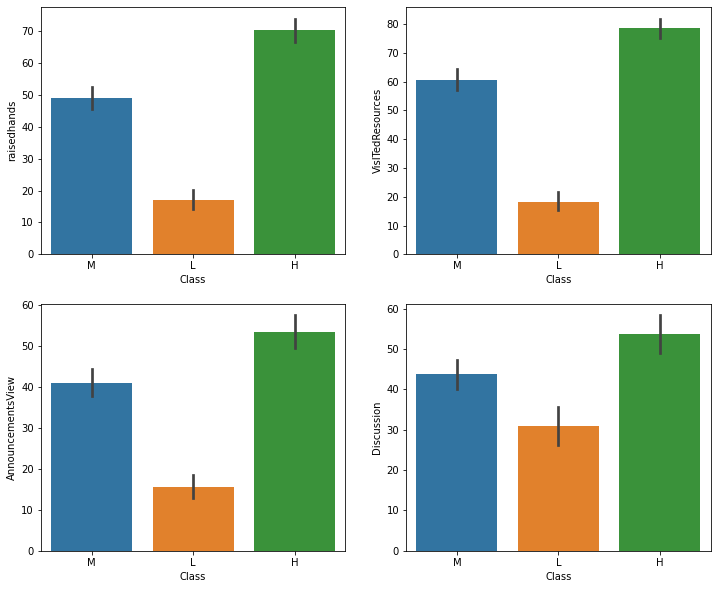

In [11]:
f ,axes =plt.subplots(2,2,figsize=(12,10))

sns.barplot(x='Class',y='raisedhands',data=Edu,ax=axes[0,0])
sns.barplot(x='Class',y='VisITedResources',data=Edu,ax=axes[0,1])
sns.barplot(x='Class',y='AnnouncementsView',data=Edu,ax=axes[1,0])
sns.barplot(x='Class',y='Discussion',data=Edu,ax=axes[1,1])

<AxesSubplot:xlabel='gender', ylabel='Discussion'>

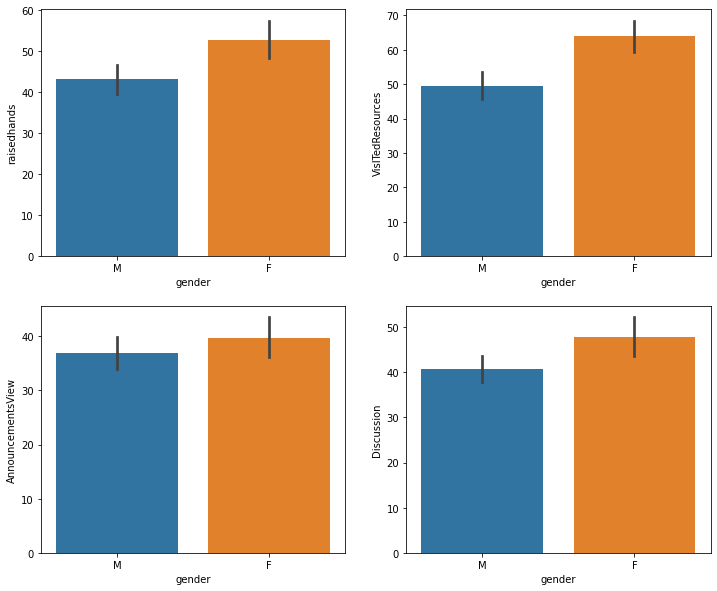

In [12]:
f ,axes =plt.subplots(2,2,figsize=(12,10))

sns.barplot(x='gender',y='raisedhands',data=Edu,ax=axes[0,0])
sns.barplot(x='gender',y='VisITedResources',data=Edu,ax=axes[0,1])
sns.barplot(x='gender',y='AnnouncementsView',data=Edu,ax=axes[1,0])
sns.barplot(x='gender',y='Discussion',data=Edu,ax=axes[1,1])

### Insights from Above Visualization
* Students who raised hands in class and asked doubts, who visited resources and checks announcements and had discussion , they are scoring a higher grades
* Most of students having higher grades are Females, Males are lagging behind in grades

## Q.4 From the above result, what are the factors that leads to get low grades of the students?

In [13]:
Result = pd.crosstab(Edu['Class'], Edu['gender'], normalize = 'columns')
Result1 = pd.crosstab(Edu['Class'], Edu['Topic'], normalize = 'columns')
Result2 = pd.crosstab(Edu['Class'], Edu['NationalITy'], normalize = 'columns')
Result3 = pd.crosstab(Edu['Class'], Edu['StudentAbsenceDays'], normalize = 'columns')
print(Result)
print(Result1)
print(Result2)
print(Result3)

gender         F         M
Class                     
H       0.428571  0.219672
L       0.137143  0.337705
M       0.434286  0.442623
Topic    Arabic   Biology  Chemistry   English    French  Geology   History  \
Class                                                                         
H      0.322034  0.533333   0.416667  0.377778  0.307692     0.25  0.210526   
L      0.288136  0.133333   0.333333  0.222222  0.246154     0.00  0.157895   
M      0.389831  0.333333   0.250000  0.400000  0.446154     0.75  0.631579   

Topic        IT      Math     Quran   Science  Spanish  
Class                                                   
H      0.157895  0.285714  0.363636  0.313725     0.20  
L      0.400000  0.333333  0.272727  0.196078     0.32  
M      0.442105  0.380952  0.363636  0.490196     0.48  
NationalITy     Egypt      Iran      Iraq    Jordan        KW  Lybia  Morocco  \
Class                                                                           
H            0.222222 

* Students who are getting low grades, 33% of them are male students and Females are stonger in studies
* Students who are getting low grades, their grades are low in Topic IT which is 40% followed by Math & Chemistry 33%, they need to focus on that
* Students who are from Kuwait, Egypt, Tunis they are having low grades like 38% and 33% as compared to other Nations
* Students who are getting low grades, their absenty for school is more than 7 days which is 60% 

## Q.5 Build classification model and present it's classification report?

## Checking for Outlier

<AxesSubplot:xlabel='raisedhands'>

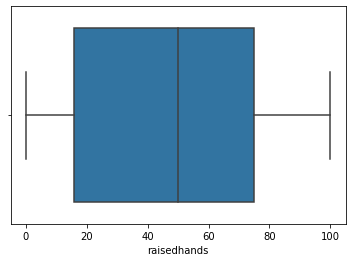

In [14]:
sns.boxplot(Edu.raisedhands)

<AxesSubplot:xlabel='VisITedResources'>

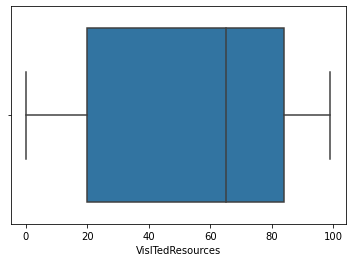

In [15]:
sns.boxplot(Edu.VisITedResources)

<AxesSubplot:xlabel='Discussion'>

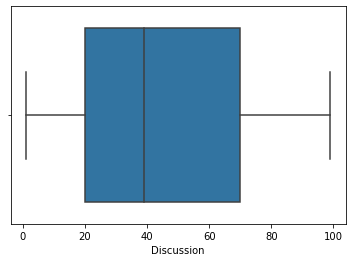

In [16]:
sns.boxplot(Edu.Discussion)

<AxesSubplot:xlabel='AnnouncementsView'>

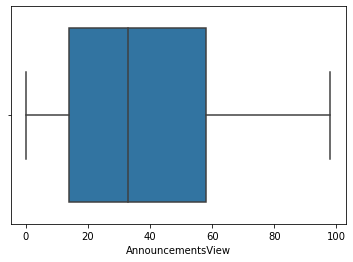

In [17]:
sns.boxplot(Edu.AnnouncementsView)

#### No outliers found

## Data Visualisation

### Bad Rate Analysis

In [18]:
import plotly.express as px

fig = px.pie(Edu,names='Class',color='Class',
             color_discrete_map={'L':'Red',
                                 'M':'Yellow',
                                'H':'Green'})
fig.show()

### Reject Students Data = Bad Students

In [19]:
Edu_Yes= Edu[Edu["Class"] == "H"]  

Edu_Yes

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
10,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,88,30,80,Yes,Good,Under-7,H
14,F,KW,KuwaIT,MiddleSchool,G-08,A,Math,F,Mum,62,70,44,60,No,Bad,Above-7,H
19,M,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Mum,70,50,40,99,Yes,Good,Under-7,H
30,F,KW,KuwaIT,MiddleSchool,G-08,A,Arabic,F,Father,35,80,50,70,Yes,Good,Under-7,H
47,F,KW,KuwaIT,HighSchool,G-12,A,English,F,Mum,70,4,39,90,Yes,Good,Under-7,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,M,Iraq,Iraq,MiddleSchool,G-08,A,Chemistry,S,Father,80,90,80,83,Yes,Good,Under-7,H
464,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,F,Mum,85,99,42,90,Yes,Good,Under-7,H
465,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Mum,89,96,45,92,Yes,Good,Under-7,H
466,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Mum,80,82,64,58,Yes,Good,Under-7,H


In [20]:
fig = px.sunburst(Edu_Yes, path=["gender",'StageID','Topic',
                                    'Semester','StudentAbsenceDays','Class'])
fig.show()

### Interpretation : Trend Analysis
* Student == Male, Middle school, Topic-IT, Semester-F, Absenty Above-7 == Lower Grade
* Student == Female, High School, Topic-English, Semester-F, Absenty Under-7 == Higher Grade

## Breaking Data into Two Part
 * Quantitative Variable
 * Qualitative Variable

In [21]:
# Qualitative Variable
Quantitative_Variable = Edu[Edu.select_dtypes(include=[np.number]).columns.tolist()]
Quantitative_Variable.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,15,16,2,20
1,20,20,3,25
2,10,7,0,30
3,30,25,5,35
4,40,50,12,50


In [22]:
Qualitative_Variable = Edu[Edu.select_dtypes(include=['object']).columns.tolist()]
Qualitative_Variable.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,M


### Converting Qualitative Variable into Number

In [23]:
from sklearn.preprocessing import LabelEncoder
Qualitative_Variable=Qualitative_Variable.apply(LabelEncoder().fit_transform) # label in ascending order
Qualitative_Variable.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,1,1,1,2
1,1,4,4,2,1,0,7,0,0,1,1,1,2
2,1,4,4,2,1,0,7,0,0,0,0,0,1
3,1,4,4,2,1,0,7,0,0,0,0,0,1
4,1,4,4,2,1,0,7,0,0,0,0,0,2


### Combining the Dataset

In [24]:
Final_combined = pd.concat([Qualitative_Variable, Quantitative_Variable],axis=1)
Final_combined.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,1,4,4,2,1,0,7,0,0,1,1,1,2,15,16,2,20
1,1,4,4,2,1,0,7,0,0,1,1,1,2,20,20,3,25
2,1,4,4,2,1,0,7,0,0,0,0,0,1,10,7,0,30
3,1,4,4,2,1,0,7,0,0,0,0,0,1,30,25,5,35
4,1,4,4,2,1,0,7,0,0,0,0,0,2,40,50,12,50


## Data Partition

In [25]:
from sklearn.model_selection import train_test_split

# define our input variable (X) & output variable
X = Final_combined.drop('Class', axis = 1)
Y = Final_combined[['Class']]
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=15)

## Model Building

## Hypothesis

* H0 :- There is no log linear relationship between Class and all independent Variable

Vs 

* H1 :- There is log linear relationship between Class and all independent Variable

Alpha = 0.05 (5%)

## Method : Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(solver="liblinear")
output=logreg.fit(X_train, y_train)

In [27]:
output.intercept_ # B0

array([-1.66294024,  0.23663517,  0.20242868])

In [28]:
output.coef_ #B1

array([[-6.50994425e-01, -1.24322900e-01,  1.55183471e-01,
        -1.75801239e+00, -5.61132864e-01,  8.60068585e-02,
        -8.17399462e-02,  1.57690704e-01,  8.25217484e-01,
         7.33098347e-01,  4.93283482e-01,  2.04867543e+00,
         3.21652243e-02,  6.68495346e-03, -3.98753895e-03,
         1.17417710e-02],
       [ 4.41974465e-01,  2.54909153e-01, -2.24232912e-01,
         1.15080293e+00,  2.95220227e-01, -1.64012460e-03,
         3.48309458e-02,  6.75259985e-01,  1.68623006e-01,
        -1.06060494e+00, -1.60112860e-01, -2.94793852e+00,
        -2.63304398e-02, -3.03611483e-02, -3.10654179e-02,
        -1.12534257e-03],
       [ 1.51405028e-01,  1.51372280e-02, -8.21378578e-02,
        -3.75709259e-01, -2.36309804e-02,  1.60054322e-04,
         2.89310159e-02, -1.73946484e-01, -7.40952242e-01,
         1.47482303e-01, -3.38918909e-01,  5.33914233e-01,
        -1.55680323e-02,  1.77174532e-02,  1.15769053e-02,
        -8.58176581e-03]])

In [29]:
output.n_features_in_

16

####  We Reject Ho
* There is log linear relationship between There is log linear relationship between Class
  and all independent Variable

## Predictions on Train Dataset

In [30]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class
241,1,0,0,1,4,1,10,1,0,1,1,1,72,80,58,86,2
336,0,7,3,2,0,0,4,0,1,0,1,1,70,90,20,21,2
12,1,4,4,2,1,0,7,0,0,0,0,0,5,1,0,11,1
292,0,7,7,2,1,0,10,0,1,1,1,1,90,86,82,74,0
127,1,4,4,2,0,1,7,0,0,0,0,0,55,33,6,9,1


In [31]:
train['Predicted']=output.predict(X_train)
train.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,Predicted
241,1,0,0,1,4,1,10,1,0,1,1,1,72,80,58,86,2,2
336,0,7,3,2,0,0,4,0,1,0,1,1,70,90,20,21,2,0
12,1,4,4,2,1,0,7,0,0,0,0,0,5,1,0,11,1,1
292,0,7,7,2,1,0,10,0,1,1,1,1,90,86,82,74,0,0
127,1,4,4,2,0,1,7,0,0,0,0,0,55,33,6,9,1,1


## Model Performance Metrics

In [32]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(train['Predicted'], train['Class'])
matrix

array([[ 75,   0,  27],
       [  0,  73,  13],
       [ 30,  11, 107]], dtype=int64)

In [33]:
from sklearn.metrics import classification_report
print(classification_report(train['Class'],train['Predicted']))

              precision    recall  f1-score   support

           0       0.74      0.71      0.72       105
           1       0.85      0.87      0.86        84
           2       0.72      0.73      0.73       147

    accuracy                           0.76       336
   macro avg       0.77      0.77      0.77       336
weighted avg       0.76      0.76      0.76       336



* According to the model accuracy is 76% on Train data,So model is Good fit
* Accuracy of Bad Grade Capture by Model is 87% ( Sensitivity )
* Accuracy of Good Grade Capture by Model is 73% ( specificity)

## Prediction on Test Dataset

In [34]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class
377,1,3,3,2,0,1,0,1,1,1,0,0,32,82,59,63,2
278,1,7,3,1,3,0,3,0,1,0,1,1,82,31,52,25,2
228,1,4,4,0,8,1,8,1,1,1,1,0,73,84,77,81,0
383,1,2,2,2,0,1,0,1,1,1,1,1,70,83,29,33,0
354,1,3,3,2,0,1,4,0,1,1,1,1,30,98,42,21,0


In [35]:
test['Predicted']=output.predict(X_test)
test.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,Predicted
377,1,3,3,2,0,1,0,1,1,1,0,0,32,82,59,63,2,2
278,1,7,3,1,3,0,3,0,1,0,1,1,82,31,52,25,2,0
228,1,4,4,0,8,1,8,1,1,1,1,0,73,84,77,81,0,2
383,1,2,2,2,0,1,0,1,1,1,1,1,70,83,29,33,0,0
354,1,3,3,2,0,1,4,0,1,1,1,1,30,98,42,21,0,2


## Model Performance Metrics on Test data

In [36]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test['Predicted'],test['Class'])
print(matrix)

[[26  0 17]
 [ 0 38  8]
 [11  5 39]]


In [37]:
from sklearn.metrics import classification_report
print(classification_report(test['Class'],test['Predicted']))

              precision    recall  f1-score   support

           0       0.60      0.70      0.65        37
           1       0.83      0.88      0.85        43
           2       0.71      0.61      0.66        64

    accuracy                           0.72       144
   macro avg       0.71      0.73      0.72       144
weighted avg       0.72      0.72      0.71       144



* According to the model accuracy is 72% on Test data,So model is Good fit
* Accuracy of Bad Grade Capture by Model is 88% ( Sensitivity )
* Accuracy of Good Grade Capture by Model is 61% ( Specificity)

In [38]:
output.intercept_,output.coef_

(array([-1.66294024,  0.23663517,  0.20242868]),
 array([[-6.50994425e-01, -1.24322900e-01,  1.55183471e-01,
         -1.75801239e+00, -5.61132864e-01,  8.60068585e-02,
         -8.17399462e-02,  1.57690704e-01,  8.25217484e-01,
          7.33098347e-01,  4.93283482e-01,  2.04867543e+00,
          3.21652243e-02,  6.68495346e-03, -3.98753895e-03,
          1.17417710e-02],
        [ 4.41974465e-01,  2.54909153e-01, -2.24232912e-01,
          1.15080293e+00,  2.95220227e-01, -1.64012460e-03,
          3.48309458e-02,  6.75259985e-01,  1.68623006e-01,
         -1.06060494e+00, -1.60112860e-01, -2.94793852e+00,
         -2.63304398e-02, -3.03611483e-02, -3.10654179e-02,
         -1.12534257e-03],
        [ 1.51405028e-01,  1.51372280e-02, -8.21378578e-02,
         -3.75709259e-01, -2.36309804e-02,  1.60054322e-04,
          2.89310159e-02, -1.73946484e-01, -7.40952242e-01,
          1.47482303e-01, -3.38918909e-01,  5.33914233e-01,
         -1.55680323e-02,  1.77174532e-02,  1.15769053e-0

## Odds Ratio

In [39]:
Model_Odds=pd.DataFrame(np.exp(model.params),columns=["Odds_Ratio"])
Model_Odds

NameError: name 'model' is not defined